pour travailler à deux

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_selector

In [8]:
df = pd.read_csv('data_set/SBAnational-EDA.csv')
df = df.drop(columns=['Unnamed: 0', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr'], axis=1).reset_index(drop=True)
df = df.drop(columns=['CreateJob', 'RetainedJob'], axis=1).reset_index(drop=True)

X = df.drop(columns=['MIS_Status'], axis=1).reset_index(drop=True)
y = df[['MIS_Status']].reset_index(drop=True)

display(X.head(1))
display(y.head(1))

,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,GrAppv,SBA_Appv
0,EVANSVILLE,IN,47711,FIFTH THIRD BANK,IN,451120,1997-02-28,1997-01-01,84,4,2.0,1,0,N,Y,60000.0,48000.0


,MIS_Status
0,P I F


___
# matrice de correlation

In [9]:
df_cible = df.copy()

colonnes_non_numeriques = make_column_selector(dtype_exclude=np.number)(df_cible)
label_encoder = LabelEncoder()
for colonne in colonnes_non_numeriques:
    df_cible[colonne] = label_encoder.fit_transform(df_cible[colonne])

display(df_cible.head(1))

correlation_matrix = df_cible.corr()

,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,8544,15,47711,1021,16,451120,5037,30,84,4,2.0,1,0,1,1,1,60000.0,48000.0


### TARGET

In [10]:
# Définir le seuil de corrélation
seuil = 0.1
print(f"Seuil = {seuil}")

# Créer une liste pour stocker les paires de features et leurs valeurs de corrélation
paires_features_correlation_TARGET = []

# Extraire les paires de features et leurs valeurs de corrélation UNIQUEMENT pour la target
for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix.index[abs(correlation_matrix[col]) > seuil]
    for correlated_col in correlated_cols:
        if correlated_col != col and col == 'MIS_Status':  # Pour éviter d'ajouter la corrélation de la feature elle-même et les doublons
            paires_features_correlation_TARGET.append((col, correlated_col, correlation_matrix.loc[col, correlated_col]))

# Convertir l'ensemble des paires de features uniques en un DataFrame
df_paires_features_correlation_TARGET = pd.DataFrame(list(paires_features_correlation_TARGET), columns=['Feature 1', 'Feature 2', 'Corrélation'])

# Appliquer une coloration selon la corrélation
styled_df_TARGET = df_paires_features_correlation_TARGET.style.background_gradient(cmap='coolwarm', subset=['Corrélation'])

# Afficher le DataFrame avec la coloration
display(styled_df_TARGET)

Seuil = 0.1


,Feature 1,Feature 2,Corrélation
0,MIS_Status,NAICS,-0.107035
1,MIS_Status,ApprovalDate,-0.207113
2,MIS_Status,ApprovalFY,-0.206942
3,MIS_Status,Term,0.314947
4,MIS_Status,UrbanRural,-0.159653
5,MIS_Status,GrAppv,0.120855
6,MIS_Status,SBA_Appv,0.132773


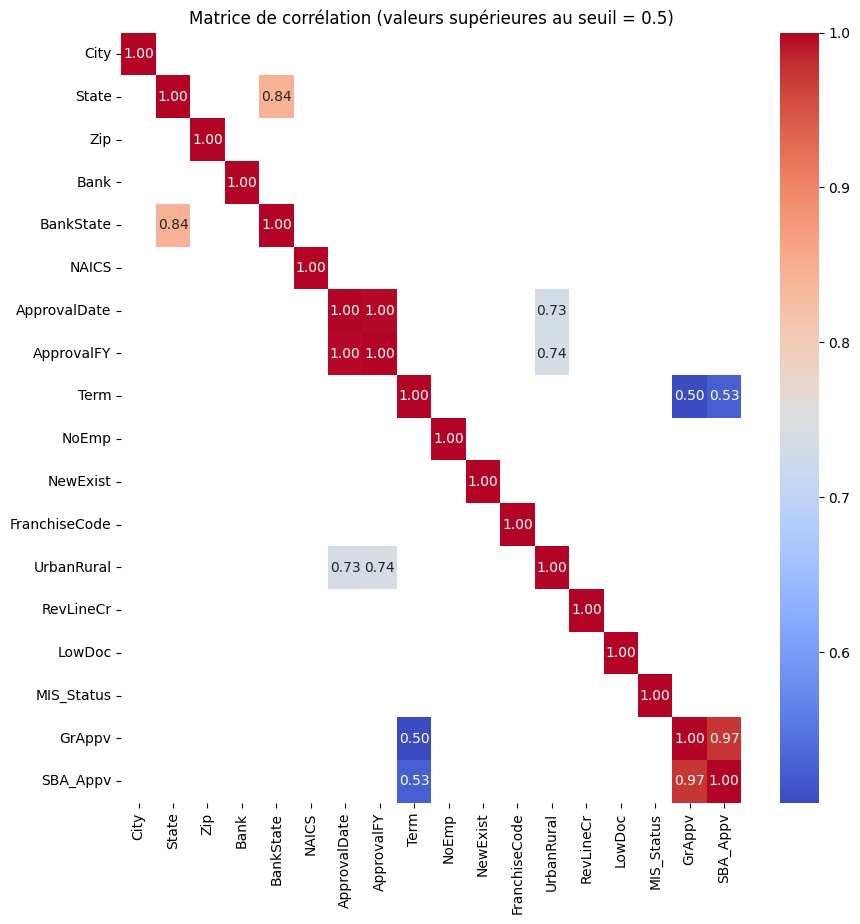

,Feature 1,Feature 2,Corrélation
0,BankState,State,0.843234
1,ApprovalDate,ApprovalFY,0.997863
2,ApprovalDate,UrbanRural,0.732345
3,ApprovalFY,UrbanRural,0.738529
4,GrAppv,Term,0.502681
5,GrAppv,SBA_Appv,0.974309
6,SBA_Appv,Term,0.525066


In [13]:
# Définir le seuil de corrélation
seuil = 0.5

# Créer une liste pour stocker les paires de features et leurs valeurs de corrélation
paires_features_correlation = []

# Extraire les paires de features et leurs valeurs de corrélation
for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix.index[abs(correlation_matrix[col]) > seuil]
    for correlated_col in correlated_cols:
        if correlated_col != col and correlated_col > col:  # Pour éviter d'ajouter la corrélation de la feature elle-même et les doublons
            paires_features_correlation.append((col, correlated_col, correlation_matrix.loc[col, correlated_col]))

# Filtrer les valeurs de la matrice de corrélation pour ne garder que celles supérieures au seuil
correlation_matrix_filtree = correlation_matrix[abs(correlation_matrix) > seuil]

# Créer une heatmap avec seaborn pour afficher les valeurs supérieures au seuil
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix_filtree, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Matrice de corrélation (valeurs supérieures au seuil = {seuil})')
plt.show()

# Afficher les paires de features et leurs valeurs de corrélation
# Convertir l'ensemble des paires de features uniques en un DataFrame
df_paires_features_correlation = pd.DataFrame(list(paires_features_correlation), columns=['Feature 1', 'Feature 2', 'Corrélation'])

# Appliquer une coloration selon la corrélation
styled_df = df_paires_features_correlation.style.background_gradient(cmap='coolwarm', subset=['Corrélation'])

# Afficher le DataFrame avec la coloration
display(styled_df)